# In Class Exercise 7.4: Picking Your Major
Use the tools we have discussed we can start looking at associations by groups in the dataset `'recent-grads.csv'`, which contains data about employment and salaries for recent college graduates. The data comes from [here](https://github.com/fivethirtyeight/data/tree/master/college-majors) and was used for the story [The Economic Guide to Picking Your Major](https://fivethirtyeight.com/features/the-economic-guide-to-picking-a-college-major/), published by [fivethirtyeight](https://fivethirtyeight.com/).

## Imports and Dataframe

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# For slightly nicer charts
plt.rcParams['figure.figsize'] = [10, 6]
plt.rcParams['figure.dpi'] = 150
sns.set(style="ticks")

In [3]:
# open full dataset assign to variable
df_grad_full = pd.read_csv("..//recent-grads.csv") # students should ignore this

# use label based indexing to create a NEW dataset that only contains a few columns (use .copy())
df = df_grad_full[['Major_category', 'Major', 'ShareWomen', 'Unemployment_rate', 'Median']].copy()

# create a list to use to rename the columns
rename_list = ['Major_Cat', 'Major', 'Prcnt_Female', 'Prcnt_Unemploy', 'Income_Median'] 

# rename columns by assigning the list we made to the dataframe's columns property
df.columns = rename_list 

# check the result
df.head()

,Major_Cat,Major,Prcnt_Female,Prcnt_Unemploy,Income_Median
0,Engineering,PETROLEUM ENGINEERING,0.120564,0.018381,110000
1,Engineering,MINING AND MINERAL ENGINEERING,0.101852,0.117241,75000
2,Engineering,METALLURGICAL ENGINEERING,0.153037,0.024096,73000
3,Engineering,NAVAL ARCHITECTURE AND MARINE ENGINEERING,0.107313,0.050125,70000
4,Engineering,CHEMICAL ENGINEERING,0.341631,0.061098,65000


Variables represent the following: 
* Major_Cat: Majors grouped into categories
* Major: Title of Major
* Prcnt_Female: Percentage of graduates classified as female
* Prcnt_Unemploy: Rate of unemployment
* Income_Median: Median earnings of full-time, year-round workers

## 1. Median Income - Top Majors
Use `groupby()`, `mean()`, `sort_values()`, and `tail()` to produce a list of top ten majors for median income.

In [22]:
# enter and test code here

df.groupby(by='Major')['Income_Median'].mean().sort_values().tail(10)

Major
ELECTRICAL ENGINEERING                        60000
COMPUTER ENGINEERING                          60000
ACTUARIAL SCIENCE                             62000
ASTRONOMY AND ASTROPHYSICS                    62000
NUCLEAR ENGINEERING                           65000
CHEMICAL ENGINEERING                          65000
NAVAL ARCHITECTURE AND MARINE ENGINEERING     70000
METALLURGICAL ENGINEERING                     73000
MINING AND MINERAL ENGINEERING                75000
PETROLEUM ENGINEERING                        110000
Name: Income_Median, dtype: int64

## 2. Median Income - Bottom Majors
Produce a list of the ten majors with the lowest median income.

In [5]:
# enter and test code here

df.groupby(by='Major')['Income_Median'].mean().sort_values().head(10)

Major
LIBRARY SCIENCE                                  22000
COUNSELING PSYCHOLOGY                            23400
CLINICAL PSYCHOLOGY                              25000
EDUCATIONAL PSYCHOLOGY                           25000
ZOOLOGY                                          26000
DRAMA AND THEATER ARTS                           27000
COMPOSITION AND RHETORIC                         27000
OTHER FOREIGN LANGUAGES                          27500
ANTHROPOLOGY AND ARCHEOLOGY                      28000
COMMUNICATION DISORDERS SCIENCES AND SERVICES    28000
Name: Income_Median, dtype: int64

## 3. Percent Female - Top Majors
Produce a list of top ten majors for percentage of women graduating.

In [6]:
# enter and test code here

df.groupby(by='Major')['Prcnt_Female'].mean().sort_values().tail(10)

Major
NURSING                                          0.896019
SOCIAL WORK                                      0.904075
HUMAN SERVICES AND COMMUNITY ORGANIZATION        0.905590
SPECIAL NEEDS EDUCATION                          0.906677
FAMILY AND CONSUMER SCIENCES                     0.910933
ELEMENTARY EDUCATION                             0.923745
MEDICAL ASSISTING SERVICES                       0.927807
COMMUNICATION DISORDERS SCIENCES AND SERVICES    0.967998
EARLY CHILDHOOD EDUCATION                        0.968954
FOOD SCIENCE                                          NaN
Name: Prcnt_Female, dtype: float64

## 4. Percent Female - Bottom Majors
Use `groupby()`, `mean()`, `sort_values()`, and `tail()` to produce a list of top ten majors for percentage of women graduating.

In [7]:
# enter and test code here

df.groupby(by='Major')['Prcnt_Female'].mean().sort_values().head(10)

Major
MILITARY TECHNOLOGIES                          0.000000
MECHANICAL ENGINEERING RELATED TECHNOLOGIES    0.077453
CONSTRUCTION SERVICES                          0.090713
MINING AND MINERAL ENGINEERING                 0.101852
NAVAL ARCHITECTURE AND MARINE ENGINEERING      0.107313
MECHANICAL ENGINEERING                         0.119559
PETROLEUM ENGINEERING                          0.120564
TRANSPORTATION SCIENCES AND TECHNOLOGIES       0.124950
FORESTRY                                       0.125035
AEROSPACE ENGINEERING                          0.139793
Name: Prcnt_Female, dtype: float64

## 5. Single Correlation
Produce a single Pearson's r statistic for the correlation betweeen median income and percent female.

In [8]:
# enter and test code here

df['Income_Median'].corr(df['Prcnt_Female'])

-0.6186897512131608

## 6. Correlation Table
Produce a correlation table from the dataframe.

In [9]:
# enter and test code here

df.corr()

,Prcnt_Female,Prcnt_Unemploy,Income_Median
Prcnt_Female,1.000000,0.073205,-0.618690
Prcnt_Unemploy,0.073205,1.000000,-0.108833
Income_Median,-0.618690,-0.108833,1.000000


## 7. Heatmap
Produce a heatmap from the dataframe.

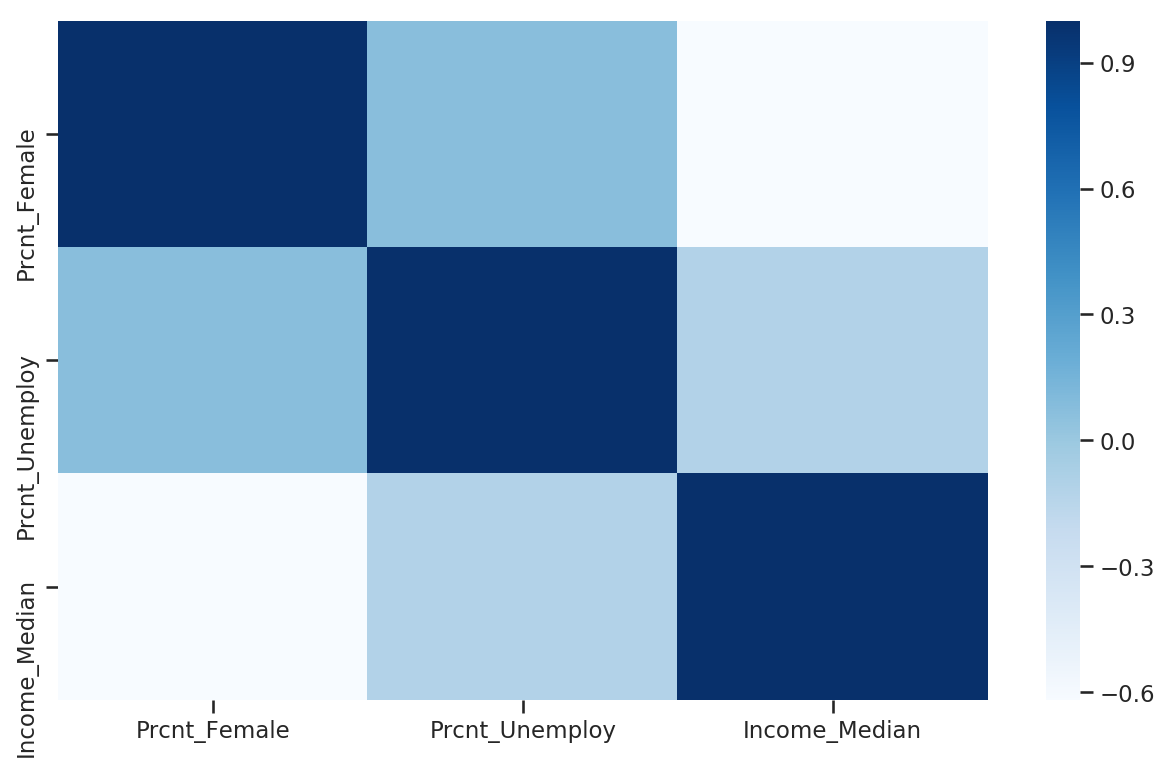

In [10]:
# enter and test code here

correlation_table = df.corr()
sns.heatmap(correlation_table, cmap="Blues")

## 8. Scatter Matrix
* Select any any three "major categories" that weren't used in the assigned reading. (Remember you can use `unique()` to get a list of unique values from a series.) 
* Create a new dataframe that only contains entries from the major categories that you selected
* Create a scatter matrix examining percent female and median income by major category
* Interpret every cell in the scatter matrix. What does these visualizations tell you about the data?

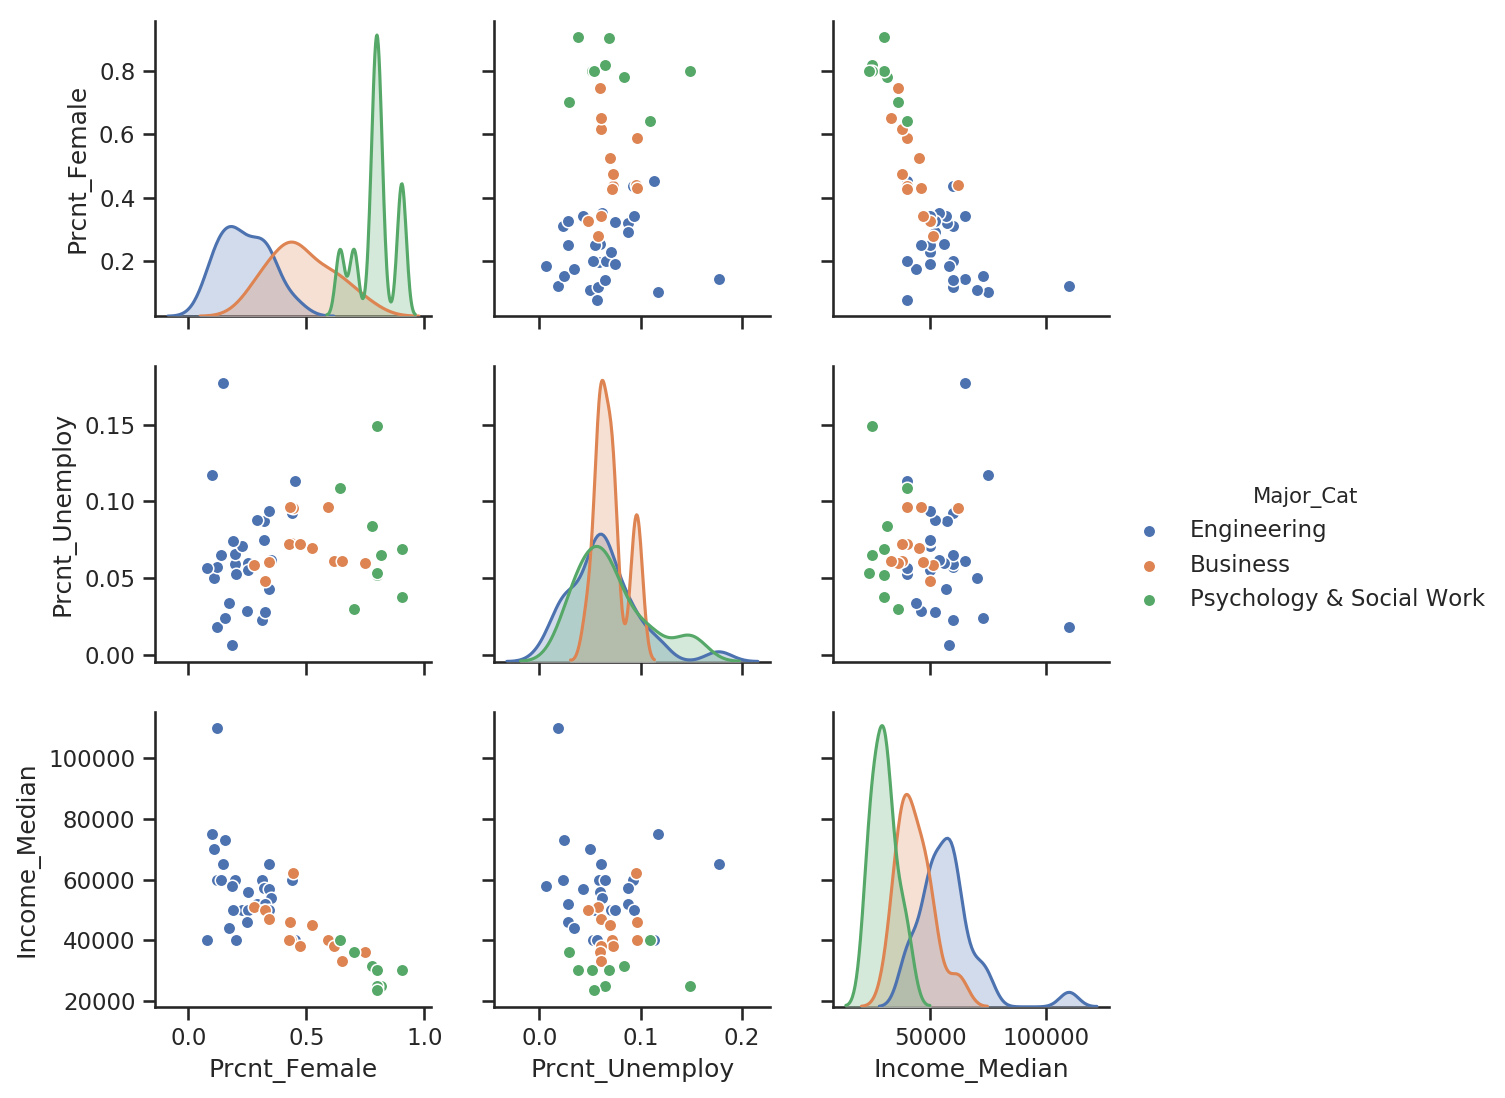

In [11]:
# enter and test code here

df.Major_Cat.unique()
df3majors = df.query('Major_Cat == "Engineering" or Major_Cat == "Business" or Major_Cat == "Psychology & Social Work"')
sns.pairplot(df3majors, hue='Major_Cat')

## 9. Some Other Things to Do
A. What are the top five majors with more than 50% female graduates with the highest median income?

In [12]:
# enter and test code here

dffemale = df.query("Prcnt_Female > .50")
dffemale.groupby(by='Major')['Income_Median'].mean().sort_values().tail(5)

Major
ACCOUNTING                                                    45000
NUCLEAR, INDUSTRIAL RADIOLOGY, AND BIOLOGICAL TECHNOLOGIES    46000
NURSING                                                       48000
PUBLIC POLICY                                                 50000
ASTRONOMY AND ASTROPHYSICS                                    62000
Name: Income_Median, dtype: int64

B. Make a horizontal bar chart visualizing the result to the previous question.

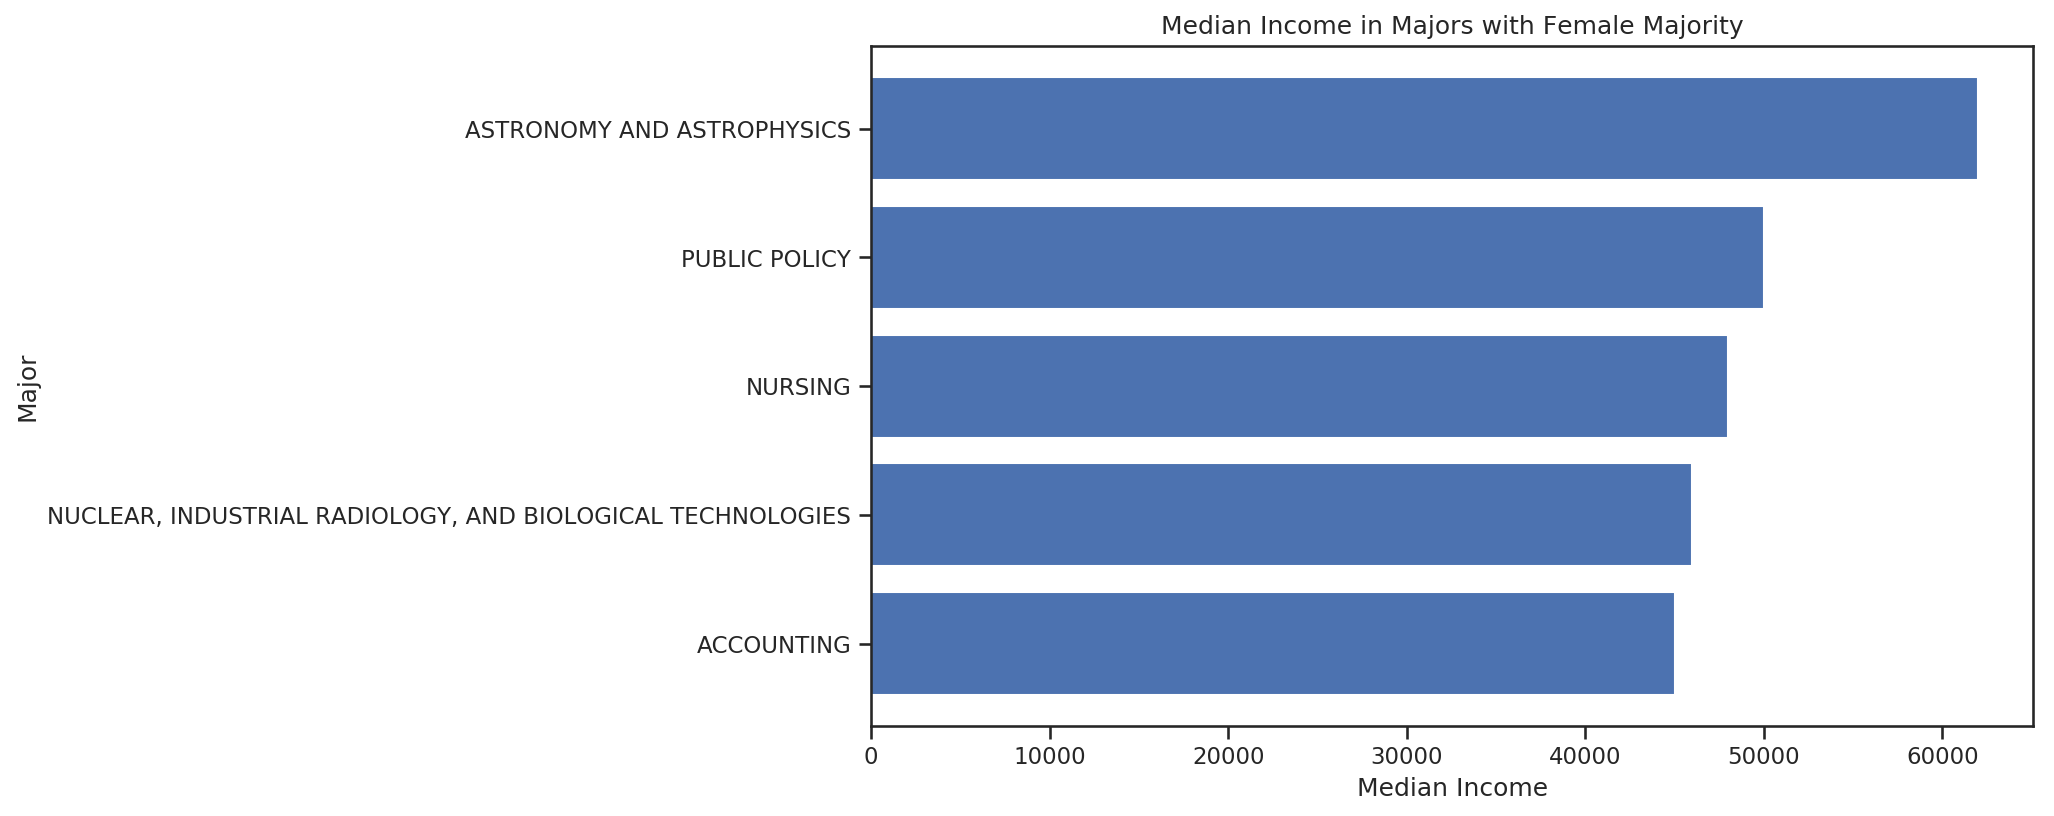

In [13]:
# enter and test code here

femalebar = dffemale.groupby(by='Major')['Income_Median'].mean().sort_values().tail(5)

plt.barh(y=femalebar.index, width=femalebar.values)
plt.xlabel("Median Income")
plt.ylabel("Major")
plt.title("Median Income in Majors with Female Majority")
plt.show()

C. What major has the highest unemployment rate?

In [14]:
# enter and test code here

df.groupby(by='Major')['Prcnt_Unemploy'].mean().sort_values().tail(1)

Major
NUCLEAR ENGINEERING    0.177226
Name: Prcnt_Unemploy, dtype: float64

D. Plot a histogram of the unemployment rate.

(array([ 8., 14., 27., 48., 34., 28.,  9.,  1.,  3.,  1.]),
 array([0.        , 0.01772264, 0.03544528, 0.05316792, 0.07089056,
        0.0886132 , 0.10633584, 0.12405848, 0.14178113, 0.15950377,
        0.17722641]),
 <a list of 10 Patch objects>)

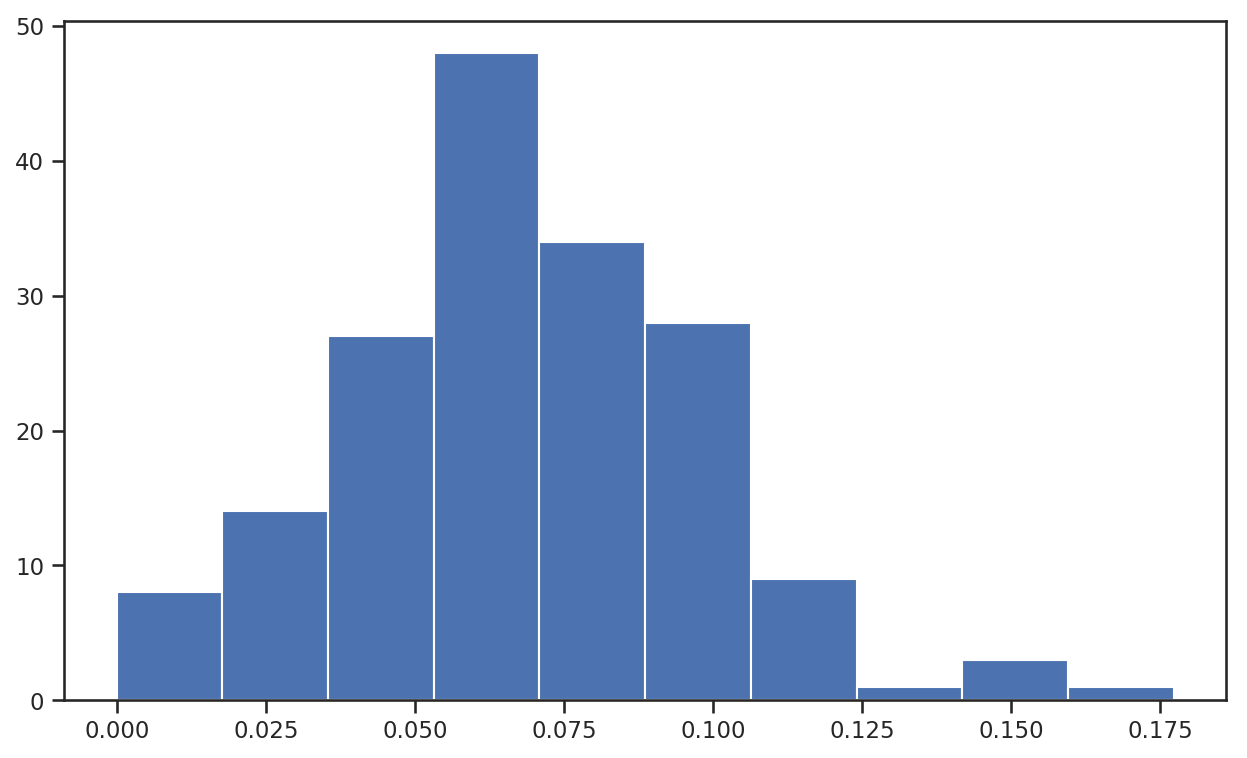

In [15]:
# enter and test code here

plt.hist(df['Prcnt_Unemploy'])

E. Excluding the "Engineering" major category, what are the top five median income majors?

In [16]:
# enter and test code here

dfnoengin = df.query("Major_Cat != 'Engineering'")
dfnoengin.groupby(by='Major')['Income_Median'].mean().sort_values().tail(5)

Major
FOOD SCIENCE                  53000
COMPUTER SCIENCE              53000
COURT REPORTING               54000
ASTRONOMY AND ASTROPHYSICS    62000
ACTUARIAL SCIENCE             62000
Name: Income_Median, dtype: int64

## Some Optional Stuff.
Create standard scores for median income, unemployment, and percent female by:
* subtracting the mean value for each column from the value
* then dividing the result by the standard deviation (to do this use the '.std()' method on a series)
* then assigning the result to new columns in the data frame 

Use the standard scores to create your own personal index score that creates a weighted combination of  median income, unemployment, and percent female to find your ideal major. 

In [26]:
# calculate standard scores
df['Prcnt_Female_stan'] = (df['Prcnt_Female'] - df['Prcnt_Female'].mean()) / df['Prcnt_Female'].std()
df['Prcnt_Unemploy_stan'] = (df['Prcnt_Unemploy'] - df['Income_Median'].mean()) / df['Income_Median'].std()
df['Income_Median_stan'] = (df['Income_Median'] - df['Income_Median'].mean()) / df['Income_Median'].std()

# example weighted index
df['major_weighted'] = (2 * df['Prcnt_Female_stan']) + (1.5 * df['Income_Median_stan']) - (.5 * df['Prcnt_Unemploy_stan'])

df.groupby(by='Major')['major_weighted'].mean().sort_values().tail(5)

Major
SCHOOL STUDENT COUNSELING     4.735722
MEDICAL ASSISTING SERVICES    5.500429
NURSING                       6.010094
PETROLEUM ENGINEERING         7.410134
FOOD SCIENCE                       NaN
Name: major_weighted, dtype: float64